# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Insightful summary"
InsertApproach = "03-insightful-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

material_id  full_formula  AtomicOrbitals|HOMO_character  \
0     mvc-12905         Fe4O8                            3.0   
1         mp-24            C8                            2.0   
2         mp-47            C4                            2.0   
3         mp-66            C2                            2.0   
4        mp-149           Si2                            2.0   
..          ...           ...                            ...   
585  mp-1275839  Co4Bi24S8O64                            3.0   
586  mp-1291058  Sr4Mn2Mo2O12                            3.0   
587  mp-1291630       Fe12O16                            3.0   
588  mp-1298346     Sr8Co4O16                            3.0   
589  mp-1539137      Rb1Cr5S8                            3.0   

     AtomicOrbitals|HOMO_element  AtomicOrbitals|HOMO_energy  \
0                             26                   -0.295049   
1                              6                   -0.199186   
2                              6                   -0.199186   
3                              6                   -0.199186   
4                             14                   -0.153293   
..                           ...                         ...   
585                           27                   -0.322368   
586                           25                   -0.266540   
587                           26                   -0.295049   
588                           27                   -0.322368   
589                           24                   -0.118123   

     AtomicOrbitals|LUMO_character  AtomicOrbitals|LUMO_element  \
0                              3.0                           26   
1                              2.0                            6   
2                              2.0                            6   
3                              2.0                            6   
4                              2.0                           14   
..                             ...                          ...   
585                            3.0                           27   
586                            3.0                           25   
587                            3.0                           26   
588                            3.0                           27   
589                            3.0                           24   

     AtomicOrbitals|LUMO_energy  \
0                     -0.295049   
1                     -0.199186   
2                     -0.199186   
3                     -0.199186   
4                     -0.153293   
..                          ...   
585                   -0.322368   
586                   -0.266540   
587                   -0.295049   
588                   -0.322368   
589                   -0.118123   

     AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010  \
0                                             0.040992            
1                                             1.000000            
2                                             1.000000            
3                                             1.000000            
4                                             1.000000            
..                                                 ...            
585                                           0.034641            
586                                           0.052116            
587                                           0.091832            
588                                           0.057864            
589                                           0.033111            

     AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010  ...  \
0                                             0.067233           ...   
1                                             1.000000           ...   
2                                             1.000000           ...   
3                                             1.000000           ...   
4                                             1.000000           ...   
.. 

In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-19-03-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)
Summary["MP BG"] = generatedData["MP_Eg"]

In [8]:
for known_candidate in known_candidates:
    with pd.option_context('display.max_rows', 100, 'display.max_columns', 12):
        print(known_candidate)
        display(Summary[Summary["pretty_formula"]==known_candidate])

SiC


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

SiGe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

C


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
15385   mp-630227          C60              C   0.0  0.433807  0.0  0.000000   
16153   mp-667273          C60              C   1.0  0.874914  0.0  0.000000   
16406   mp-680372          C60              C   0.0  0.313422  0.0  0.000000   
16481   mp-683919         C140              C   0.0  0.358009  0.0  0.000000   
21329  mp-1194362          C28              C   0.0  0.053399  0.0  0.018587   
22128  mp-1196583         C240              C   1.0  0.693451  0.0  0.000000   
24102  mp-1203645          C48              C   0.0  0.037840  1.0  1.000000   
24551  mp-1205417          C20              C   1.0  0.763506  0.0  0.018587   

       RF    RF Prob  GB    GB Prob   MP BG  
15385  0.0  0.476389  0.0  0.240796  0.9100  
16153  0.0  0.440000  0.0  0.402958  1.2370  
16406  0.0  0.400317  0.0  0.116961  0.7132  
16481  0.0  0.360000  0.0  0.006752  1.1035  
21329  0.0  0.467500  0.0  0.015358  2.0672  
22128  0.0  0.310000  0.0  0.002193  1.3517  
24102  0.0  0.421429  0.0  0.007918  1.8637  
24551  0.0  0.223333  0.0  0.005828  4.1975

Si


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaN


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaAs


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlN


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnS


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnSe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnO


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlP


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

GaP


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

AlAs


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

ZnTe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

CdS


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
44         mp-344         B4N4             BN   0.0  0.368908  1.0  0.888889   
238       mp-1599         B4N4             BN   0.0  0.315578  1.0  1.000000   
241       mp-1639         B1N1             BN   1.0  0.999891  1.0  0.959459   
385       mp-2653         B2N2             BN   1.0  0.999107  1.0  0.959459   
3088     mp-13151         B4N4             BN   1.0  0.998157  1.0  0.888889   
5149     mp-20305       In1As1           InAs   1.0  0.890361  0.0  0.000000   
15781   mp-644751         B4N4             BN   1.0  0.981835  1.0  0.888889   
19246  mp-1077506         B3N3             BN   1.0  0.661792  1.0  0.888889   

       RF    RF Prob  GB    GB Prob   MP BG  
44     1.0  0.665064  1.0  0.978666  3.5021  
238    0.0  0.318112  1.0  0.826922  1.6009  
241    1.0  0.777815  1.0  0.997104  4.6482  
385    1.0  0.785501  1.0  0.997153  5.3630  
3088   1.0  0.704531  1.0  0.989108  4.8257  
5149   1.0  0.500717  0.0  0.046679  0.3050  
15781  0.0  0.477601  0.0  0.362146  5.6697  
19246  0.0  0.418571  1.0  0.680031  1.0837

In [10]:
atleast_one_model = Summary[(Summary["RF "] == 1) | 
                       (Summary["DT "] == 1) |
                       (Summary["GB "] == 1) | 
                       (Summary["LOG "] == 1)]

atleast_one_model.to_csv(models_dir / InsertApproach / "summary" / "atleast_one_model.csv")
atleast_one_model

material_id   full_formula pretty_formula  LOG   LOG Prob  DT   \
0            mp-7             S6              S   1.0  0.598674  0.0   
1           mp-14            Se3             Se   1.0  0.835284  1.0   
2           mp-19            Te3             Te   1.0  0.789933  1.0   
3           mp-25             N8             N2   1.0  0.941349  0.0   
4           mp-77            S32              S   1.0  0.560646  0.0   
...           ...            ...            ...   ...       ...  ...   
24375  mp-1204768  Li8B48H132N28    Li2B12H33N7   0.0  0.013799  1.0   
24392  mp-1204824     Li4B4H32N8      LiB(H4N)2   0.0  0.035898  1.0   
24512  mp-1205326      Tb7Pt1I12       Tb7PtI12   0.0  0.066183  0.0   
24551  mp-1205417            C20              C   1.0  0.763506  0.0   
24593  mp-1238445   Be8H64N16F32     BeH8(NF2)2   0.0  0.020878  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
0      0.400000  1.0  0.647200  1.0  0.981282  2.4881  
1      0.959459  1.0  0.629434  0.0  0.477746  1.0119  
2      0.959459  0.0  0.427531  0.0  0.016642  0.5752  
3      0.400000  1.0  0.567684  1.0  0.979574  7.4564  
4      0.018587  0.0  0.403333  0.0  0.470994  2.7125  
...         ...  ...       ...  ...       ...     ...  
24375  1.000000  0.0  0.300294  1.0  0.577723  4.6069  
24392  1.000000  0.0  0.252516  1.0  0.622949  5.5330  
24512  0.018587  0.0  0.349246  1.0  0.982325  0.1021  
24551  0.018587  0.0  0.223333  0.0  0.005828  4.1975  
24593  1.000000  0.0  0.270294  1.0  0.577723  6.5561  

[1152 rows x 12 columns]

In [11]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):
    display(generatedData[["material_id", "MP_Eg", "MP|Polar SG"]][generatedData["pretty_formula"]=="RuC"])

material_id   MP_Eg  MP|Polar SG
18790  mp-1009792  0.7149            0

## How many entries does the models agree on? 

In [12]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG[RF_DT_GB_LOG["MP BG"]>0.5]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
7          mp-111          Ne1             Ne   1.0  0.999749  1.0  0.959459   
10         mp-147          Se6             Se   1.0  0.573968  1.0  0.959459   
27         mp-252       Be1Te1           BeTe   1.0  0.803121  1.0  0.959459   
135        mp-938       Ge1Te1           GeTe   1.0  0.593217  1.0  0.959459   
147       mp-1039       Mg2Te2           MgTe   1.0  0.944222  1.0  0.959459   
...           ...          ...            ...   ...       ...  ...       ...   
19350  mp-1078780     Zn1Cd3S4        ZnCd3S4   1.0  0.565442  1.0  0.959459   
19396  mp-1079201       B2C4N2           BC2N   1.0  0.997324  1.0  0.888889   
19823  mp-1104073        C11N4          C11N4   1.0  0.979759  1.0  0.888889   
19844  mp-1104326      Ho2V2O8          HoVO4   1.0  1.000000  1.0  1.000000   
22549  mp-1198022         Ge34             Ge   1.0  0.868757  1.0  0.959459   

       RF    RF Prob  GB    GB Prob    MP BG  
7      1.0  0.700230  1.0  0.951907  11.8025  
10     1.0  0.584573  1.0  0.945412   1.5761  
27     1.0  0.776303  1.0  0.955265   2.2113  
135    1.0  0.530327  1.0  0.865107   0.8215  
147    1.0  0.744670  1.0  0.969070   2.3620  
...    ...       ...  ...       ...      ...  
19350  1.0  0.620100  1.0  0.954339   1.2164  
19396  1.0  0.778031  1.0  0.988445   1.1736  
19823  1.0  0.618571  1.0  0.525333   2.8141  
19844  1.0  0.620000  1.0  0.997603   0.8789  
22549  1.0  0.758402  1.0  0.995713   0.6701  

[85 rows x 12 columns]

In [13]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[(Summary["DT Prob"] > 0.8) & 
                    (Summary["GB Prob"] > 0.8) & 
                    (Summary["LOG Prob"] > 0.8)])

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
7          mp-111          Ne1             Ne   1.0  0.999749  1.0  0.959459   
27         mp-252       Be1Te1           BeTe   1.0  0.803121  1.0  0.959459   
147       mp-1039       Mg2Te2           MgTe   1.0  0.944222  1.0  0.959459   
151       mp-1070       Cd2Se2           CdSe   1.0  0.864988  1.0  0.959459   
165       mp-1156       Ga1Sb1           GaSb   1.0  0.842941  1.0  0.959459   
217       mp-1479         B1P1             BP   1.0  0.938128  1.0  0.959459   
224       mp-1541       Be1Se1           BeSe   1.0  0.873370  1.0  0.959459   
229       mp-1569        Be2C1           Be2C   1.0  0.882524  1.0  0.888889   
241       mp-1639         B1N1             BN   1.0  0.999891  1.0  0.959459   
259       mp-1778        Be1O1            BeO   1.0  0.960334  1.0  0.888889   
263       mp-1794        Be1O1            BeO   1.0  0.999495  1.0  0.888889   
366       mp-2542        Be2O2            BeO   1.0  0.996214  1.0  0.888889   
377       mp-2624       Al1Sb1           AlSb   1.0  0.902305  1.0  0.959459   
385       mp-2653         B2N2             BN   1.0  0.999107  1.0  0.959459   
390       mp-2691       Cd1Se1           CdSe   1.0  0.903074  1.0  0.959459   
413       mp-2857        Sc1N1            ScN   1.0  0.893325  1.0  0.888889   
683       mp-3829    Cd2Sn2As4        CdSnAs2   1.0  0.808894  1.0  0.959459   
862       mp-4524     Zn2Ge2P4         ZnGeP2   1.0  0.908094  1.0  0.959459   
1068      mp-5238     Ga2Cu2S4         GaCuS2   1.0  0.831565  1.0  0.959459   
1834      mp-7599        Be4O4            BeO   1.0  0.886182  1.0  0.888889   
1933      mp-7913     Be4Si4N8         BeSiN2   1.0  0.864222  1.0  0.888889   
2596     mp-10013        Sn1S1            SnS   1.0  0.870751  1.0  0.959459   
3064     mp-13031       Mg1Se1           MgSe   1.0  0.840868  1.0  0.959459   
3065     mp-13032        Mg1S1            MgS   1.0  0.859654  1.0  0.959459   
3066     mp-13033       Mg1Te1           MgTe   1.0  0.928026  1.0  0.959459   
3081     mp-13099         Y1N1             YN   1.0  0.825496  1.0  0.959459   
3088     mp-13151         B4N4             BN   1.0  0.998157  1.0  0.888889   
3639     mp-15704     Be2Si2N4         BeSiN2   1.0  0.825492  1.0  0.888889   
4735     mp-19006        Mn2O2            MnO   1.0  0.902862  1.0  0.888889   
4842     mp-19184         V4O4             VO   1.0  0.849344  1.0  0.888889   
5439     mp-22205        In2N2            InN   1.0  0.829995  1.0  0.959459   
5615     mp-22914       Cu1Cl1           CuCl   1.0  0.883126  1.0  0.959459   
5772     mp-23156          He2             He   1.0  0.999999  1.0  0.959459   
5773     mp-23158          He1             He   1.0  1.000000  1.0  0.959459   
6290     mp-24093        Cu2H2            CuH   1.0  0.978959  1.0  0.959459   
8227     mp-30148       B2C4N2           BC2N   1.0  0.998950  1.0  0.888889   
13884   mp-568145          Ar2             Ar   1.0  0.998081  1.0  0.959459   
14385   mp-570752           H2             H2   1.0  0.972601  1.0  0.959459   
14424   mp-570935        Li2I2            LiI   1.0  0.854074  1.0  0.959459   
14596   mp-571653         C3N4           C3N4   1.0  0.969155  1.0  0.888889   
15146   mp-614456          He1             He   1.0  0.999998  1.0  0.959459   
15381   mp-629458       B1C2N1           BC2N   1.0  0.999050  1.0  0.959459   
15441   mp-634659           H1             H2   1.0  0.961241  1.0  0.959459   
18551   mp-966800        In2P2            InP   1.0  0.856714  1.0  0.959459   
18689   mp-997618        B1Sb1            BSb   1.0  0.940596  1.0  0.959459   
18719   mp-999498           N4             N2   1.0  0.941501  1.0  0.888889   
18731  mp-1002164        Ge1C1            GeC   1.0  0.947824  1.0  0.959459   
18740  mp-1006880        Bi1B1            BiB   1.0  0.816766  1.0  0.959459   
18748  mp-1007776        Tl1P1            TlP   1.0  0.883559  1.0  0.959459   
18753 

In [14]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
7          mp-111              Ne1                 Ne   1.0  0.999749  1.0   
10         mp-147              Se6                 Se   1.0  0.573968  1.0   
13         mp-160              B12                  B   0.0  0.396098  1.0   
15         mp-189           Si4Ru4               SiRu   1.0  0.604836  1.0   
27         mp-252           Be1Te1               BeTe   1.0  0.803121  1.0   
...           ...              ...                ...   ...       ...  ...   
20546  mp-1190284           Bi8Se9             Bi8Se9   1.0  1.000000  1.0   
21205  mp-1193675              B28                  B   0.0  0.319106  1.0   
22119  mp-1196569      Mg17Si20O60       Mg17(SiO3)20   0.0  0.208184  1.0   
22549  mp-1198022             Ge34                 Ge   1.0  0.868757  1.0   
24314  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   0.0  0.010957  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
7      0.959459  1.0  0.700230  1.0  0.951907  11.8025  
10     0.959459  1.0  0.584573  1.0  0.945412   1.5761  
13     0.888889  1.0  0.682444  1.0  0.765719   1.5219  
15     0.959459  1.0  0.693118  1.0  0.980515   0.2541  
27     0.959459  1.0  0.776303  1.0  0.955265   2.2113  
...         ...  ...       ...  ...       ...      ...  
20546  1.000000  1.0  0.522333  1.0  0.668594   0.2393  
21205  0.888889  1.0  0.653915  1.0  0.705397   1.5349  
22119  0.959459  1.0  0.536433  1.0  0.773854   0.1226  
22549  0.959459  1.0  0.758402  1.0  0.995713   0.6701  
24314  0.959459  1.0  0.527412  1.0  0.746804   4.3207  

[132 rows x 12 columns]

In [15]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
27         mp-252       Be1Te1           BeTe   1.0  0.803121  1.0  0.959459   
151       mp-1070       Cd2Se2           CdSe   1.0  0.864988  1.0  0.959459   
217       mp-1479         B1P1             BP   1.0  0.938128  1.0  0.959459   
224       mp-1541       Be1Se1           BeSe   1.0  0.873370  1.0  0.959459   
241       mp-1639         B1N1             BN   1.0  0.999891  1.0  0.959459   
385       mp-2653         B2N2             BN   1.0  0.999107  1.0  0.959459   
862       mp-4524     Zn2Ge2P4         ZnGeP2   1.0  0.908094  1.0  0.959459   
3064     mp-13031       Mg1Se1           MgSe   1.0  0.840868  1.0  0.959459   
3066     mp-13033       Mg1Te1           MgTe   1.0  0.928026  1.0  0.959459   
5614     mp-22913       Cu1Br1           CuBr   0.0  0.412027  1.0  0.959459   
5773     mp-23158          He1             He   1.0  1.000000  1.0  0.959459   
6061     mp-23703        Li1H1            LiH   1.0  0.613642  1.0  0.888889   
8227     mp-30148       B2C4N2           BC2N   1.0  0.998950  1.0  0.888889   
15381   mp-629458       B1C2N1           BC2N   1.0  0.999050  1.0  0.959459   
18719   mp-999498           N4             N2   1.0  0.941501  1.0  0.888889   
18757  mp-1008523       B1C2N1           BC2N   1.0  0.999292  1.0  0.959459   
18779  mp-1009540        Os1C1            OsC   1.0  0.874911  1.0  0.959459   
18790  mp-1009792        Ru1C1            RuC   1.0  0.847570  1.0  0.959459   
18825  mp-1018040       Mg2Se2           MgSe   1.0  0.880764  1.0  0.959459   
19396  mp-1079201       B2C4N2           BC2N   1.0  0.997324  1.0  0.888889   
22549  mp-1198022         Ge34             Ge   1.0  0.868757  1.0  0.959459   

       RF    RF Prob  GB    GB Prob    MP BG  
27     1.0  0.776303  1.0  0.955265   2.2113  
151    1.0  0.787396  1.0  0.978497   0.5589  
217    1.0  0.776569  1.0  0.989105   1.4662  
224    1.0  0.799646  1.0  0.978091   2.8976  
241    1.0  0.777815  1.0  0.997104   4.6482  
385    1.0  0.785501  1.0  0.997153   5.3630  
862    1.0  0.820188  1.0  0.997297   1.2026  
3064   1.0  0.770713  1.0  0.898491   2.5473  
3066   1.0  0.771559  1.0  0.958576   2.3181  
5614   1.0  0.799257  1.0  0.994044   0.4871  
5773   1.0  0.812487  1.0  0.997477  17.6526  
6061   1.0  0.769599  1.0  0.819947   3.1751  
8227   1.0  0.788031  1.0  0.990300   2.1099  
15381  1.0  0.838031  1.0  0.995945   1.8463  
18719  1.0  0.846558  1.0  0.990028   4.0174  
18757  1.0  0.808571  1.0  0.997153   1.6460  
18779  1.0  0.771128  1.0  0.976184   0.1701  
18790  1.0  0.813300  1.0  0.988016   0.7149  
18825  1.0  0.766398  1.0  0.978405   2.5791  
19396  1.0  0.778031  1.0  0.988445   1.1736  
22549  1.0  0.758402  1.0  0.995713   0.6701

In [16]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

material_id     full_formula     pretty_formula  LOG   LOG Prob  DT   \
0            mp-7               S6                  S   1.0  0.598674  0.0   
3           mp-25               N8                 N2   1.0  0.941349  0.0   
7          mp-111              Ne1                 Ne   1.0  0.999749  1.0   
10         mp-147              Se6                 Se   1.0  0.573968  1.0   
11         mp-154               N8                 N2   1.0  0.935094  0.0   
...           ...              ...                ...   ...       ...  ...   
21838  mp-1195735         Te24As16             Te3As2   0.0  0.164518  0.0   
22083  mp-1196461          C156F84              C13F7   0.0  0.001204  0.0   
22119  mp-1196569      Mg17Si20O60       Mg17(SiO3)20   0.0  0.208184  1.0   
22549  mp-1198022             Ge34                 Ge   1.0  0.868757  1.0   
24314  mp-1204533  Mg45Si32H58O138  Mg45Si32(H29O69)2   0.0  0.010957  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
0      0.400000  1.0  0.647200  1.0  0.981282   2.4881  
3      0.400000  1.0  0.567684  1.0  0.979574   7.4564  
7      0.959459  1.0  0.700230  1.0  0.951907  11.8025  
10     0.959459  1.0  0.584573  1.0  0.945412   1.5761  
11     0.400000  1.0  0.548184  1.0  0.927908   7.4649  
...         ...  ...       ...  ...       ...      ...  
21838  0.000000  1.0  0.560477  1.0  0.976443   0.6958  
22083  0.400000  1.0  0.517695  1.0  0.976356   1.1244  
22119  0.959459  1.0  0.536433  1.0  0.773854   0.1226  
22549  0.959459  1.0  0.758402  1.0  0.995713   0.6701  
24314  0.959459  1.0  0.527412  1.0  0.746804   4.3207  

[243 rows x 12 columns]

In [17]:
Summary[Summary["LOG "]==1]

material_id   full_formula  pretty_formula  LOG   LOG Prob  DT   \
0            mp-7             S6               S   1.0  0.598674  0.0   
1           mp-14            Se3              Se   1.0  0.835284  1.0   
2           mp-19            Te3              Te   1.0  0.789933  1.0   
3           mp-25             N8              N2   1.0  0.941349  0.0   
4           mp-77            S32               S   1.0  0.560646  0.0   
...           ...            ...             ...   ...       ...  ...   
22549  mp-1198022           Ge34              Ge   1.0  0.868757  1.0   
23688  mp-1202132      Sr5Ti7O19       Sr5Ti7O19   1.0  1.000000  0.0   
23946  mp-1203087  Ga4Hg11P4Cl16  Ga4Hg11(PCl4)4   1.0  0.547726  0.0   
24135  mp-1203760       Si28Tc16          Si7Tc4   1.0  0.580718  0.0   
24551  mp-1205417            C20               C   1.0  0.763506  0.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
0      0.400000  1.0  0.647200  1.0  0.981282  2.4881  
1      0.959459  1.0  0.629434  0.0  0.477746  1.0119  
2      0.959459  0.0  0.427531  0.0  0.016642  0.5752  
3      0.400000  1.0  0.567684  1.0  0.979574  7.4564  
4      0.018587  0.0  0.403333  0.0  0.470994  2.7125  
...         ...  ...       ...  ...       ...     ...  
22549  0.959459  1.0  0.758402  1.0  0.995713  0.6701  
23688  0.018587  0.0  0.241429  0.0  0.004933  1.8352  
23946  0.018587  0.0  0.031534  0.0  0.000471  1.7383  
24135  0.000000  0.0  0.347400  0.0  0.002623  1.0650  
24551  0.018587  0.0  0.223333  0.0  0.005828  4.1975  

[493 rows x 12 columns]

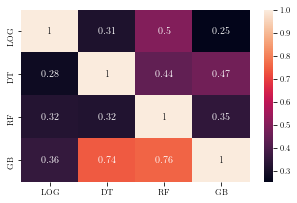

[1.0, 0.2799188640973631, 0.2231237322515213, 0.15021459227467812, 0.46924177396280403, 0.3190045248868778, 0.34763948497854075, 1.0, 1.0, 0.25178826895565093, 0.32454361054766734]


LOG LOG LOG LOG   LOG LOG LOG DT   LOG LOG RF DT   \
LOG LOG LOG LOG                1.0         0.279919        0.223124   
LOG LOG LOG DT                 1.0         0.279919        0.223124   
LOG LOG RF DT                  1.0         0.279919        0.223124   
LOG RF GB DT                   1.0         0.279919        0.223124   
DT GB DT DT                    1.0         0.279919        0.223124   
DT RF DT DT                    1.0         0.279919        0.223124   
RF RF GB GB                    1.0         0.279919        0.223124   
RF RF RF RF                    1.0         0.279919        0.223124   
GB GB GB GB                    1.0         0.279919        0.223124   
GB LOG LOG LOG                 1.0         0.279919        0.223124   
RF LOG LOG LOG                 1.0         0.279919        0.223124   

                  LOG RF GB DT   DT GB DT DT   DT RF DT DT   RF RF GB GB   \
LOG LOG LOG LOG        0.150215      0.469242      0.319005      0.347639   
LOG LOG LOG DT         0.150215      0.469242      0.319005      0.347639   
LOG LOG RF DT          0.150215      0.469242      0.319005      0.347639   
LOG RF GB DT           0.150215      0.469242      0.319005      0.347639   
DT GB DT DT            0.150215      0.469242      0.319005      0.347639   
DT RF DT DT            0.150215      0.469242      0.319005      0.347639   
RF RF GB GB            0.150215      0.469242      0.319005      0.347639   
RF RF RF RF            0.150215      0.469242      0.319005      0.347639   
GB GB GB GB            0.150215      0.469242      0.319005      0.347639   
GB LOG LOG LOG         0.150215      0.469242      0.319005      0.347639   
RF LOG LOG LOG         0.150215      0.469242      0.319005      0.347639   

                  RF RF RF RF   GB GB GB GB   GB LOG LOG LOG   RF LOG LOG LOG   
LOG LOG LOG LOG            1.0           1.0         0.251788         0.324544  
LOG LOG LOG DT             1.0           1.0         0.251788         0.324544  
LOG LOG RF DT              1.0           1.0         0.251788         0.324544  
LOG RF GB DT               1.0           1.0         0.251788         0.324544  
DT GB DT DT                1.0           1.0         0.251788         0.324544  
DT RF DT DT                1.0           1.0         0.251788         0.324544  
RF RF GB GB                1.0           1.0         0.251788         0.324544  
RF RF RF RF                1.0           1.0         0.251788         0.324544  
GB GB GB GB                1.0           1.0         0.251788         0.324544  
GB LOG LOG LOG             1.0           1.0         0.251788         0.324544  
RF LOG LOG LOG             1.0           1.0         0.251788         0.324544

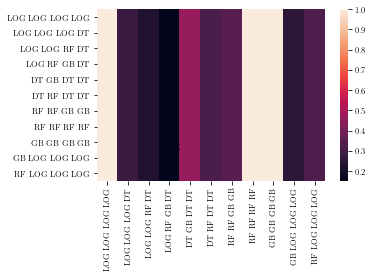

In [18]:
visualize.visualize_heatmap_of_combinations(Summary)

 45%|████▌     | 226/500 [00:00<00:00, 2253.58it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2111.62it/s]


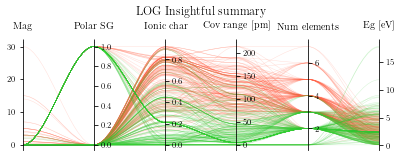

 38%|███▊      | 192/500 [00:00<00:00, 1914.72it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2017.33it/s]


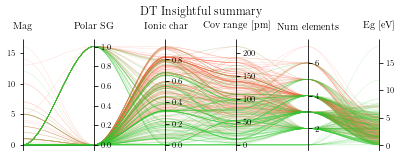

 46%|████▌     | 229/500 [00:00<00:00, 2288.49it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2135.90it/s]


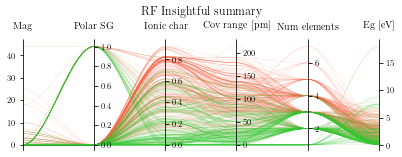

 43%|████▎     | 217/500 [00:00<00:00, 2167.54it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2149.17it/s]


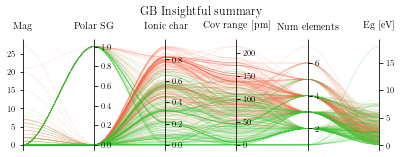

In [19]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)

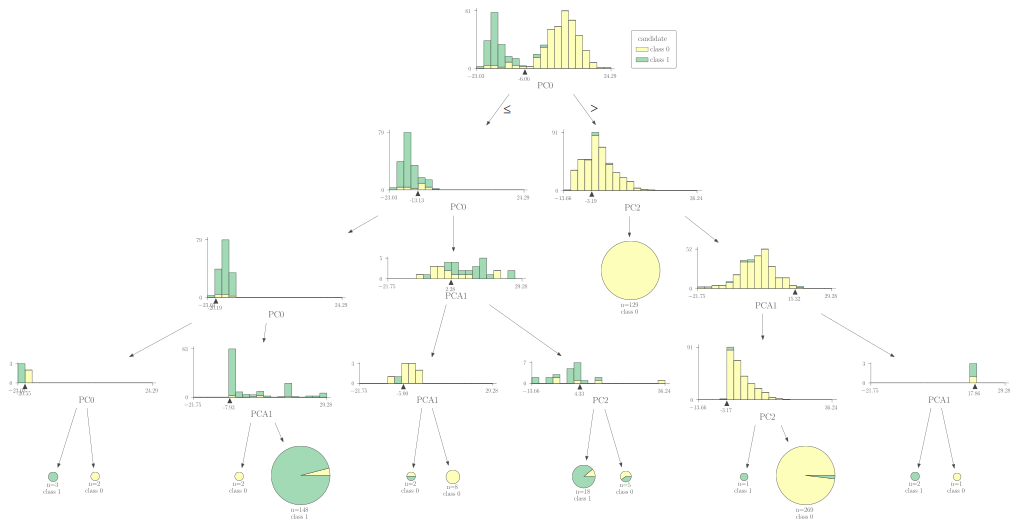

In [20]:
if InsertApproach == "03-insightful-approach":
    visualize.plot_2D3Dcontours(trainingSet, trainingSet[["candidate"]].values.reshape(-1,), Summary, abbreviations, InsertApproach, 176)

In [21]:
visualize.plot_histogram_bg_proba(Summary)

100%|██████████| 500/500 [00:00<00:00, 1960.25it/s]


/home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/reports/figures/parallel_coordinates/summary-03-insightful-approach.pgf


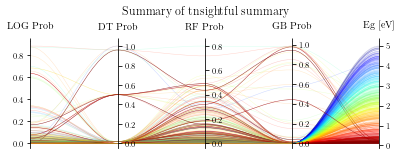

In [22]:
visualize.make_parallel_coordinate_matplot_summary(Summary, 
                                               InsertApproach, 
                                               title=str("Summary of t" + title[1:]), 
                                               applyLegend=False)

## Comparing the approaches

In [23]:
Summary_01 = pd.read_pickle(models_dir / "01-ferrenti-approach" /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary_02 = pd.read_pickle(models_dir / "02-augmented-ferrenti-approach" / "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))

In [24]:
list_mpid_03 = RF_DT_GB_LOG.material_id

In [25]:
list_mpid_02 = Summary_02[(Summary_02["RF "] == 1) & 
                          (Summary_02["DT "] == 1) & 
                          (Summary_02["GB "] == 1) & 
                          (Summary_02["LOG "] == 1)].material_id.values

list_mpid_01 = Summary_01[(Summary_01["RF "] == 1) & 
                          (Summary_01["DT "] == 1) & 
                          (Summary_01["GB "] == 1) & 
                          (Summary_01["LOG "] == 1)].material_id.values

In [26]:
print(list_mpid_01.shape, list_mpid_02.shape, list_mpid_03.shape)

(6804,) (9227,) (105,)


In [27]:
overlapping_entries2 = list_mpid_03[list_mpid_03.isin(list_mpid_02)]
overlapping_entries1 = list_mpid_03[list_mpid_03.isin(list_mpid_01)]

In [28]:
list_mpid_03

7            mp-111
10           mp-147
15           mp-189
27           mp-252
135          mp-938
            ...    
19396    mp-1079201
19823    mp-1104073
19844    mp-1104326
20546    mp-1190284
22549    mp-1198022
Name: material_id, Length: 105, dtype: object

In [29]:
print(Summary[Summary["material_id"].isin(overlapping_entries1)].shape)
print(Summary[Summary["material_id"].isin(overlapping_entries2)].shape)

(42, 12)
(71, 12)


In [30]:
Summary[(Summary["material_id"].isin(overlapping_entries1)) & Summary["material_id"].isin(overlapping_entries2)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
15         mp-189       Si4Ru4           SiRu   1.0  0.604836  1.0  0.959459   
147       mp-1039       Mg2Te2           MgTe   1.0  0.944222  1.0  0.959459   
151       mp-1070       Cd2Se2           CdSe   1.0  0.864988  1.0  0.959459   
217       mp-1479         B1P1             BP   1.0  0.938128  1.0  0.959459   
366       mp-2542        Be2O2            BeO   1.0  0.996214  1.0  0.888889   
390       mp-2691       Cd1Se1           CdSe   1.0  0.903074  1.0  0.959459   
741       mp-4008    Zn2Ge2As4        ZnGeAs2   1.0  0.503202  1.0  0.959459   
1061      mp-5213     Cd2Sn2P4         CdSnP2   1.0  0.543477  1.0  0.959459   
1834      mp-7599        Be4O4            BeO   1.0  0.886182  1.0  0.888889   
2597     mp-10044        B1As1            BAs   1.0  0.712562  1.0  0.959459   
2906     mp-12103           N2             N2   1.0  0.944064  1.0  0.959459   
3638     mp-15703      Be2C2N4          BeCN2   1.0  0.982083  1.0  0.888889   
3639     mp-15704     Be2Si2N4         BeSiN2   1.0  0.825492  1.0  0.888889   
5157     mp-20351        In1P1            InP   1.0  0.686815  1.0  0.959459   
5439     mp-22205        In2N2            InN   1.0  0.829995  1.0  0.959459   
14596   mp-571653         C3N4           C3N4   1.0  0.969155  1.0  0.888889   
15441   mp-634659           H1             H2   1.0  0.961241  1.0  0.959459   
16268   mp-672234           N4             N2   1.0  0.888347  1.0  0.959459   
18551   mp-966800        In2P2            InP   1.0  0.856714  1.0  0.959459   
18731  mp-1002164        Ge1C1            GeC   1.0  0.947824  1.0  0.959459   
18759  mp-1008528      B2As1P1          B2AsP   1.0  0.735784  1.0  0.959459   
18762  mp-1008559         B2P2             BP   1.0  0.896298  1.0  0.959459   
18779  mp-1009540        Os1C1            OsC   1.0  0.874911  1.0  0.959459   
18791  mp-1009813       Si1Sn1           SiSn   1.0  0.888879  1.0  0.959459   
18794  mp-1009820        Sn1C1            SnC   1.0  0.840825  1.0  0.959459   
18840  mp-1018132       Al1Bi1           AlBi   1.0  0.809505  1.0  0.959459   
18880  mp-1019380      Al3B1N4         Al3BN4   1.0  0.915912  1.0  0.888889   
19183  mp-1067619          Ge4             Ge   1.0  0.612634  1.0  0.959459   
19242  mp-1077316         C2O4            CO2   1.0  0.756869  1.0  1.000000   
19350  mp-1078780     Zn1Cd3S4        ZnCd3S4   1.0  0.565442  1.0  0.959459   
19823  mp-1104073        C11N4          C11N4   1.0  0.979759  1.0  0.888889   

       RF    RF Prob  GB    GB Prob   MP BG  
15     1.0  0.693118  1.0  0.980515  0.2541  
147    1.0  0.744670  1.0  0.969070  2.3620  
151    1.0  0.787396  1.0  0.978497  0.5589  
217    1.0  0.776569  1.0  0.989105  1.4662  
366    1.0  0.671759  1.0  0.981292  7.4631  
390    1.0  0.731621  1.0  0.972800  0.5095  
741    1.0  0.536920  1.0  0.975258  0.5679  
1061   1.0  0.698279  1.0  0.985204  0.6714  
1834   1.0  0.578338  1.0  0.959464  7.3457  
2597   1.0  0.604683  1.0  0.989156  1.2522  
2906   1.0  0.659076  1.0  0.652571  1.0557  
3638   1.0  0.528571  1.0  0.680031  3.8528  
3639   1.0  0.624229  1.0  0.916521  3.5618  
5157   1.0  0.637523  1.0  0.970339  0.4664  
5439   1.0  0.713991  1.0  0.980850  0.4777  
14596  1.0  0.678031  1.0  0.993195  2.8148  
15441  1.0  0.602290  1.0  0.860164  7.5517  
16268  1.0  0.688872  1.0  0.796480  3.0175  
18551  1.0  0.727198  1.0  0.984467  0.5138  
18731  1.0  0.732994  1.0  0.987904  1.8486  
18759  1.0  0.647670  1.0  0.971432  1.4447  
18762  1.0  0.735663  1.0  0.991247  1.0759  
18779  1.0  0.771128  1.0  0.976184  0.1701  
18791  1.0  0.580610  1.0  0.918456  0.4114  
18794  1.0  0.576120  1.0  0.987656  0.6337  
18840  1.0  0.606639  1.0  0.978895  0.3019  
18880  1.0  0.571556  1.0  0.944687  3.6069  
19183  1.0  0.620262  1.0  0.887806  0.7910  
19242  1.0  0.527964  1.0  0.988986  7.7230  
19350  1.0  0.620100  1.0  0.954339  1.2164  
19823  1.0  0.61857

In [31]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10000):

    display(Summary[Summary["material_id"].isin(overlapping_entries2)])

material_id  full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
15         mp-189        Si4Ru4           SiRu   1.0  0.604836  1.0  0.959459   
27         mp-252        Be1Te1           BeTe   1.0  0.803121  1.0  0.959459   
135        mp-938        Ge1Te1           GeTe   1.0  0.593217  1.0  0.959459   
147       mp-1039        Mg2Te2           MgTe   1.0  0.944222  1.0  0.959459   
151       mp-1070        Cd2Se2           CdSe   1.0  0.864988  1.0  0.959459   
165       mp-1156        Ga1Sb1           GaSb   1.0  0.842941  1.0  0.959459   
174       mp-1222        Cr3Si6          CrSi2   1.0  0.822642  1.0  0.888889   
217       mp-1479          B1P1             BP   1.0  0.938128  1.0  0.959459   
224       mp-1541        Be1Se1           BeSe   1.0  0.873370  1.0  0.959459   
229       mp-1569         Be2C1           Be2C   1.0  0.882524  1.0  0.888889   
259       mp-1778         Be1O1            BeO   1.0  0.960334  1.0  0.888889   
263       mp-1794         Be1O1            BeO   1.0  0.999495  1.0  0.888889   
359       mp-2488        Si4Os4           SiOs   1.0  0.765317  1.0  0.959459   
366       mp-2542         Be2O2            BeO   1.0  0.996214  1.0  0.888889   
385       mp-2653          B2N2             BN   1.0  0.999107  1.0  0.959459   
390       mp-2691        Cd1Se1           CdSe   1.0  0.903074  1.0  0.959459   
413       mp-2857         Sc1N1            ScN   1.0  0.893325  1.0  0.888889   
683       mp-3829     Cd2Sn2As4        CdSnAs2   1.0  0.808894  1.0  0.959459   
741       mp-4008     Zn2Ge2As4        ZnGeAs2   1.0  0.503202  1.0  0.959459   
862       mp-4524      Zn2Ge2P4         ZnGeP2   1.0  0.908094  1.0  0.959459   
943       mp-4763      Zn2Si2P4         ZnSiP2   1.0  0.787320  1.0  0.959459   
1061      mp-5213      Cd2Sn2P4         CdSnP2   1.0  0.543477  1.0  0.959459   
1834      mp-7599         Be4O4            BeO   1.0  0.886182  1.0  0.888889   
1933      mp-7913      Be4Si4N8         BeSiN2   1.0  0.864222  1.0  0.888889   
2596     mp-10013         Sn1S1            SnS   1.0  0.870751  1.0  0.959459   
2597     mp-10044         B1As1            BAs   1.0  0.712562  1.0  0.959459   
2820     mp-11191        Cr3Si6          CrSi2   1.0  0.819568  1.0  0.888889   
2906     mp-12103            N2             N2   1.0  0.944064  1.0  0.959459   
3081     mp-13099          Y1N1             YN   1.0  0.825496  1.0  0.959459   
3638     mp-15703       Be2C2N4          BeCN2   1.0  0.982083  1.0  0.888889   
3639     mp-15704      Be2Si2N4         BeSiN2   1.0  0.825492  1.0  0.888889   
4735     mp-19006         Mn2O2            MnO   1.0  0.902862  1.0  0.888889   
4842     mp-19184          V4O4             VO   1.0  0.849344  1.0  0.888889   
5157     mp-20351         In1P1            InP   1.0  0.686815  1.0  0.959459   
5439     mp-22205         In2N2            InN   1.0  0.829995  1.0  0.959459   
5573     mp-22848           Cl4            Cl2   1.0  0.754027  1.0  0.959459   
8227     mp-30148        B2C4N2           BC2N   1.0  0.998950  1.0  0.888889   
14596   mp-571653          C3N4           C3N4   1.0  0.969155  1.0  0.888889   
15381   mp-629458        B1C2N1           BC2N   1.0  0.999050  1.0  0.959459   
15441   mp-634659            H1             H2   1.0  0.961241  1.0  0.959459   
16268   mp-672234            N4             N2   1.0  0.888347  1.0  0.959459   
18551   mp-966800         In2P2            InP   1.0  0.856714  1.0  0.959459   
18689   mp-997618         B1Sb1            BSb   1.0  0.940596  1.0  0.959459   
18690   mp-998980  Ti1Al1Fe1Co1       TiAlFeCo   1.0  0.508030  1.0  0.959459   
18731  mp-1002164         Ge1C1            GeC   1.0  0.947824  1.0  0.959459   
18740  mp-1006880         Bi1B1            BiB   1.0  0.816766  1.0  0.959459   
18748  mp-1007776         Tl1P1            TlP   1.0  0.883559  1.0  0.959459   
18753  mp-1008223        Ca1Se1           CaSe   1.0  0.907104  1.0  0.959459   
18754  mp-1008394           Cl4      